641. Design Circular Deque
Design your implementation of the circular double-ended queue (deque).

Implement the MyCircularDeque class:

MyCircularDeque(int k) Initializes the deque with a maximum size of k.
boolean insertFront() Adds an item at the front of Deque. Returns true if the operation is successful, or false otherwise.
boolean insertLast() Adds an item at the rear of Deque. Returns true if the operation is successful, or false otherwise.
boolean deleteFront() Deletes an item from the front of Deque. Returns true if the operation is successful, or false otherwise.
boolean deleteLast() Deletes an item from the rear of Deque. Returns true if the operation is successful, or false otherwise.
int getFront() Returns the front item from the Deque. Returns -1 if the deque is empty.
int getRear() Returns the last item from Deque. Returns -1 if the deque is empty.
boolean isEmpty() Returns true if the deque is empty, or false otherwise.
boolean isFull() Returns true if the deque is full, or false otherwise.

数组实现的循环双端队列


这道题的前导问题是「力扣」第 622 题：设计循环队列。

在实现上几乎是一模一样的，要注意的地方有：

定义循环变量 front 和 rear 。一直保持这个定义，到底是先赋值还是先移动指针就很容易想清楚了。
front：指向队列头部第 11 个有效数据的位置；
rear：指向队列尾部（即最后 11 个有效数据）的 下一个位置，即下一个从队尾入队元素的位置。
说明：这个定义是依据「动态数组」的定义模仿而来。

为了避免「队列为空」和「队列为满」的判别条件冲突，我们有意浪费了一个位置；
浪费一个位置是指：循环数组中任何时刻一定至少有一个位置不存放有效元素。

判别队列为空的条件是：front == rear;；
判别队列为满的条件是：(rear + 1) % capacity == front;。可以这样理解，当 rear 循环到数组的前面，要从后面追上 front，还差一格的时候，判定队列为满。
因为有循环的出现，要特别注意处理数组下标可能越界的情况。
指针后移的时候，下标 + 1+1，要取模；
指针前移的时候，为了循环到数组的末尾，需要先加上数组的长度，然后再对数组长度取模。
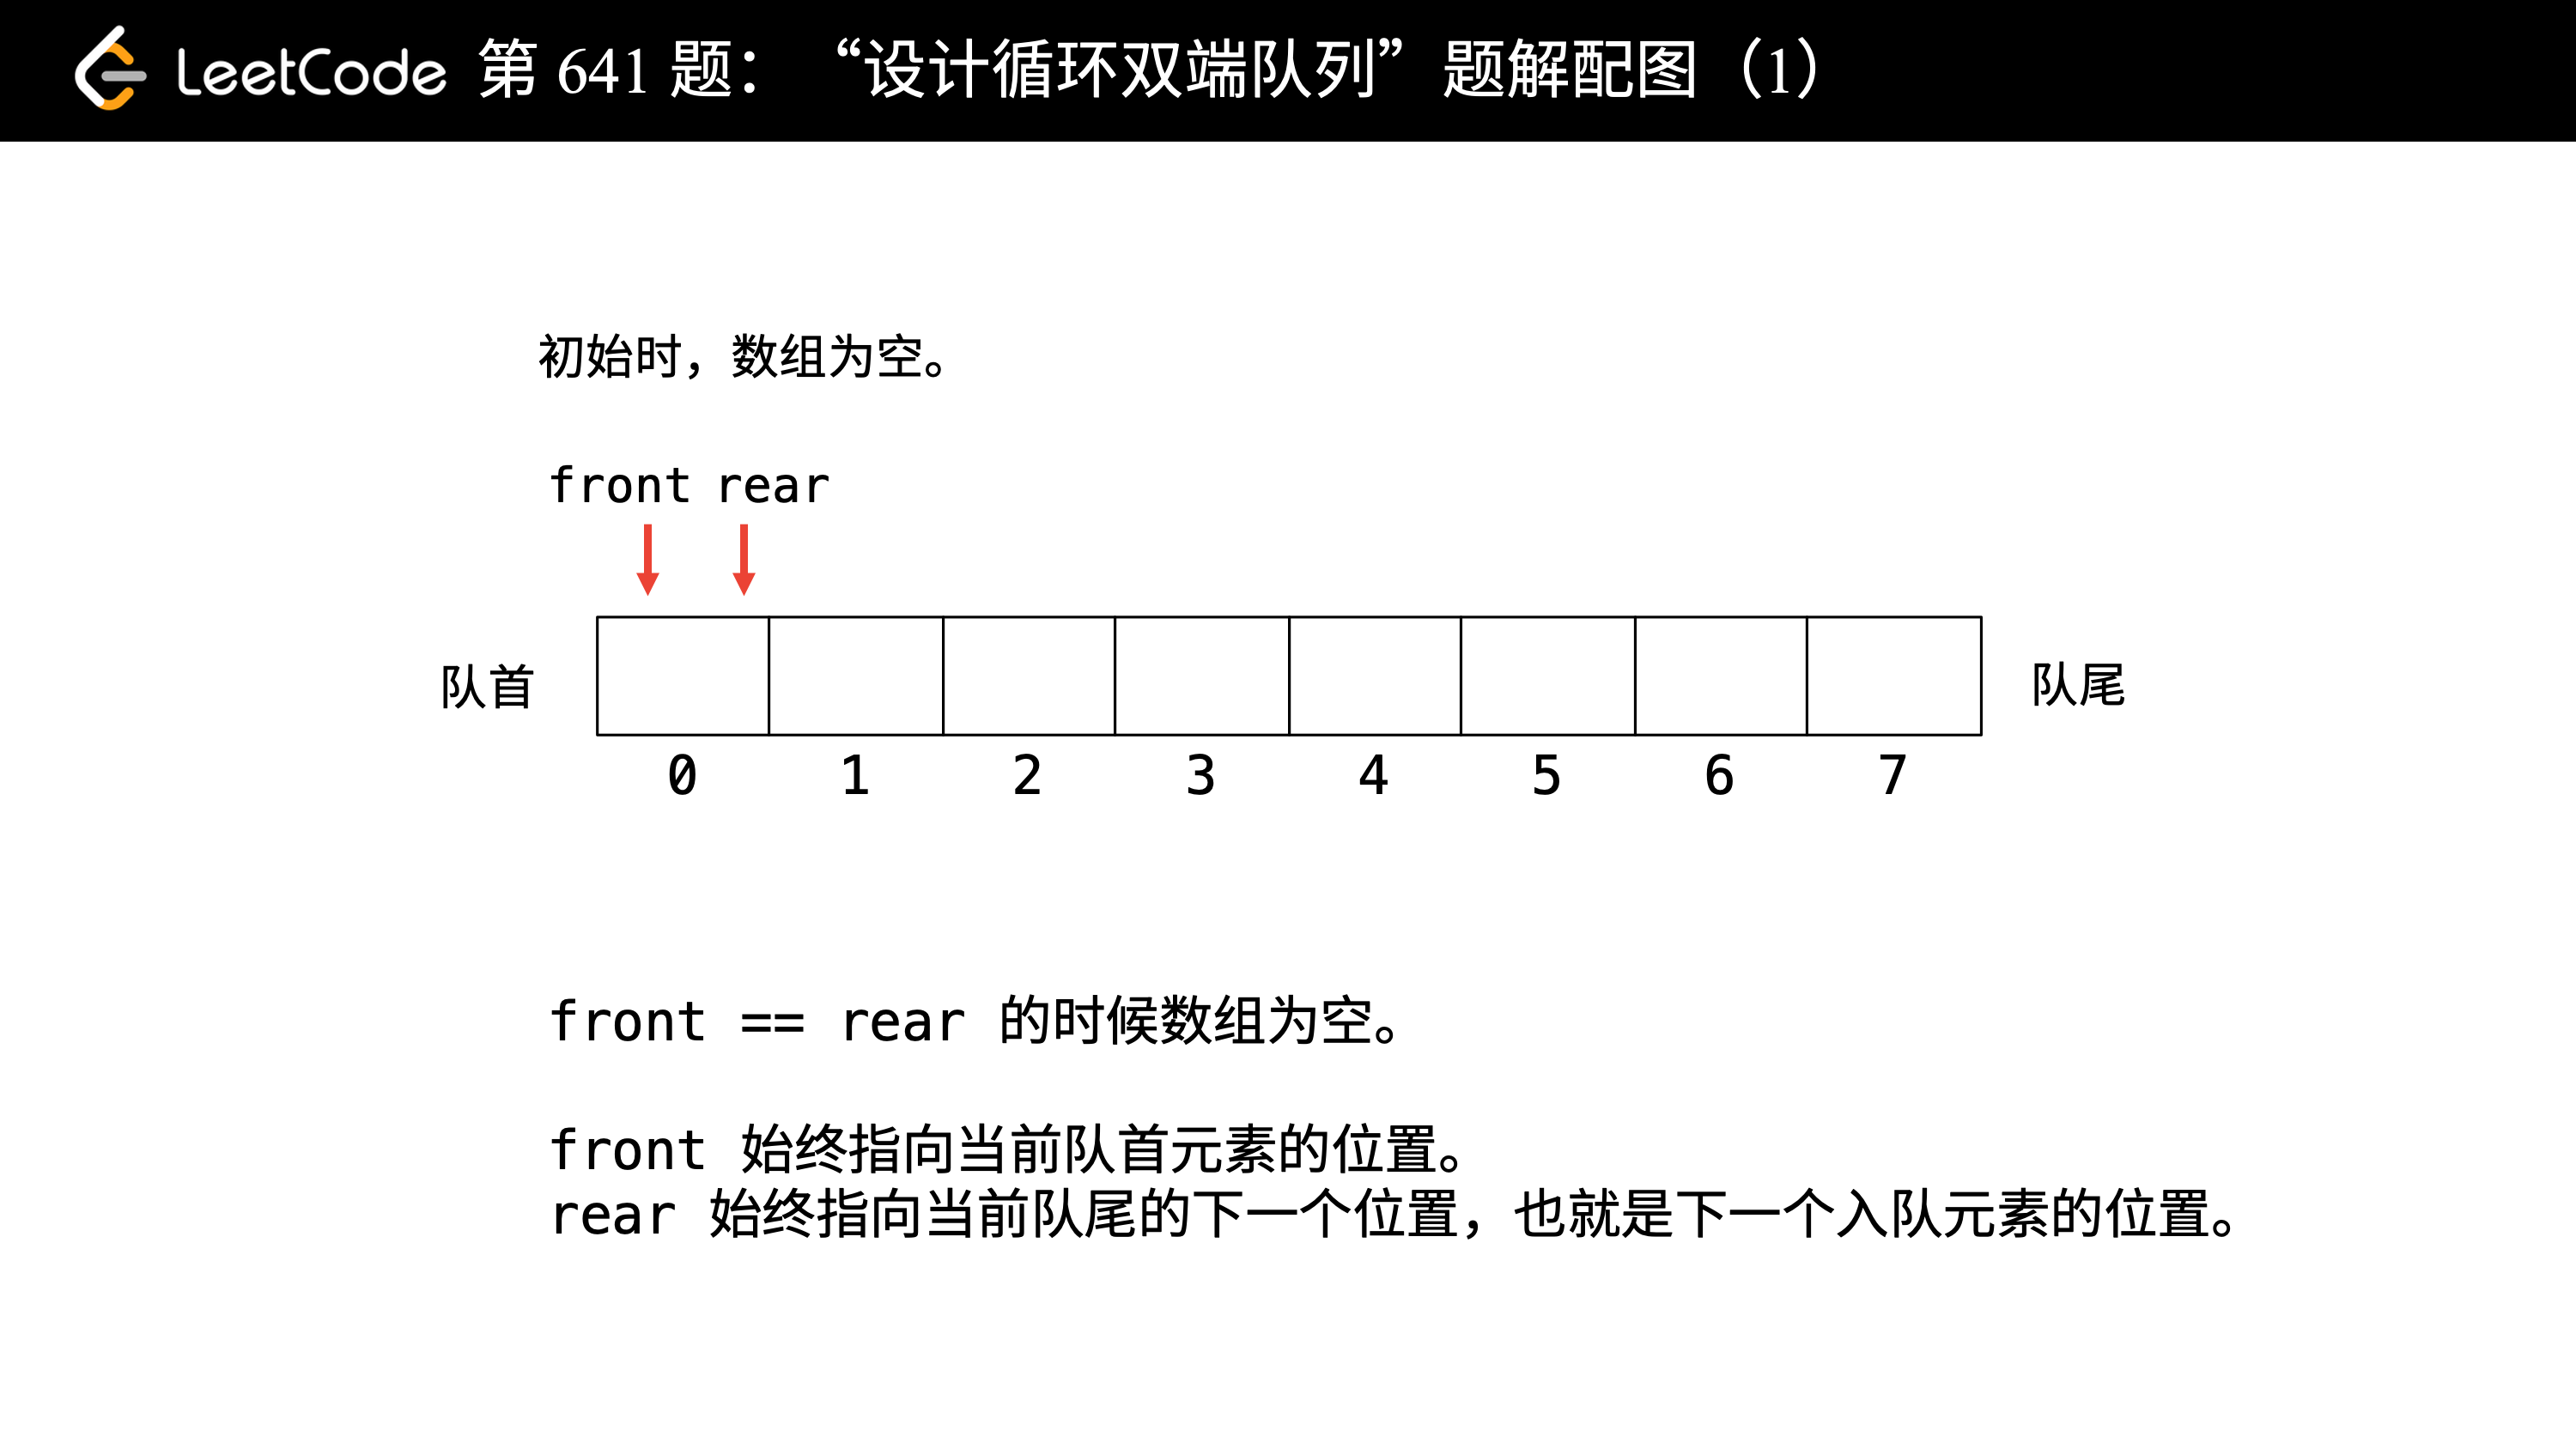

In [ ]:
class MyCircularDeque:
    def __init__(self, k: int):
        self.front = self.rear = 0
        self.elements = [0] * (k + 1)

    def insertFront(self, value: int) -> bool:
        if self.isFull():
            return False
        self.front = (self.front - 1) % len(self.elements)
        self.elements[self.front] = value
        return True

    def insertLast(self, value: int) -> bool:
        if self.isFull():
            return False
        self.elements[self.rear] = value
        self.rear = (self.rear + 1) % len(self.elements)
        return True

    def deleteFront(self) -> bool:
        if self.isEmpty():
            return False
        self.front = (self.front + 1) % len(self.elements)
        return True

    def deleteLast(self) -> bool:
        if self.isEmpty():
            return False
        self.rear = (self.rear - 1) % len(self.elements)
        return True

    def getFront(self) -> int:
        return -1 if self.isEmpty() else self.elements[self.front]

    def getRear(self) -> int:
        return -1 if self.isEmpty() else self.elements[(self.rear - 1) % len(self.elements)]

    def isEmpty(self) -> bool:
        return self.rear == self.front

    def isFull(self) -> bool:
        return (self.rear + 1) % len(self.elements) == self.front

In [ ]:
class MyCircularDeque:

    def __init__(self, k: int):
        """
        Initialize your data structure here. Set the size of the deque to be k.
        """
        self.front = 0
        self.rear = 0
        self.capacity = k + 1
        self.arr = [0] * (k + 1)

    def insertFront(self, value: int) -> bool:
        """
        Adds an item at the front of Deque. Return true if the operation is successful.
        """
        if self.isFull():
            return False
        self.front = (self.front - 1 + self.capacity) % self.capacity
        self.arr[self.front] = value
        return True

    def insertLast(self, value: int) -> bool:
        """
        Adds an item at the rear of Deque. Return true if the operation is successful.
        """
        if self.isFull():
            return False
        self.arr[self.rear] = value
        self.rear = (self.rear + 1) % self.capacity
        return True

    def deleteFront(self) -> bool:
        """
        Deletes an item from the front of Deque. Return true if the operation is successful.
        """
        if self.isEmpty():
            return False
        self.front = (self.front + 1) % self.capacity
        return True

    def deleteLast(self) -> bool:
        """
        Deletes an item from the rear of Deque. Return true if the operation is successful.
        """
        if self.isEmpty():
            return False
        self.rear = (self.rear - 1 + self.capacity) % self.capacity;
        return True

    def getFront(self) -> int:
        """
        Get the front item from the deque.
        """
        if self.isEmpty():
            return -1
        return self.arr[self.front]

    def getRear(self) -> int:
        """
        Get the last item from the deque.
        """
        if self.isEmpty():
            return -1
        return self.arr[(self.rear - 1 + self.capacity) % self.capacity]

    def isEmpty(self) -> bool:
        """
        Checks whether the circular deque is empty or not.
        """
        return self.front == self.rear

    def isFull(self) -> bool:
        """
        Checks whether the circular deque is full or not.
        """
        return (self.rear + 1) % self.capacity == self.front

作者：liweiwei1419
链接：https://leetcode.cn/problems/design-circular-deque/solution/shu-zu-shi-xian-de-xun-huan-shuang-duan-dui-lie-by/
来源：力扣（LeetCode）
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。